In [76]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
wandb.login()

True

In [77]:
ENTITY = "martingratzer-organization"
PROJECT = "CIFAR-100-RD"
api = wandb.Api()
runs = api.runs(f"{ENTITY}/{PROJECT}")

In [78]:
histories = []

for run in runs:
    history = run.history(keys=["eval_top1", "_step"],pandas=False)
    histories.append(history)

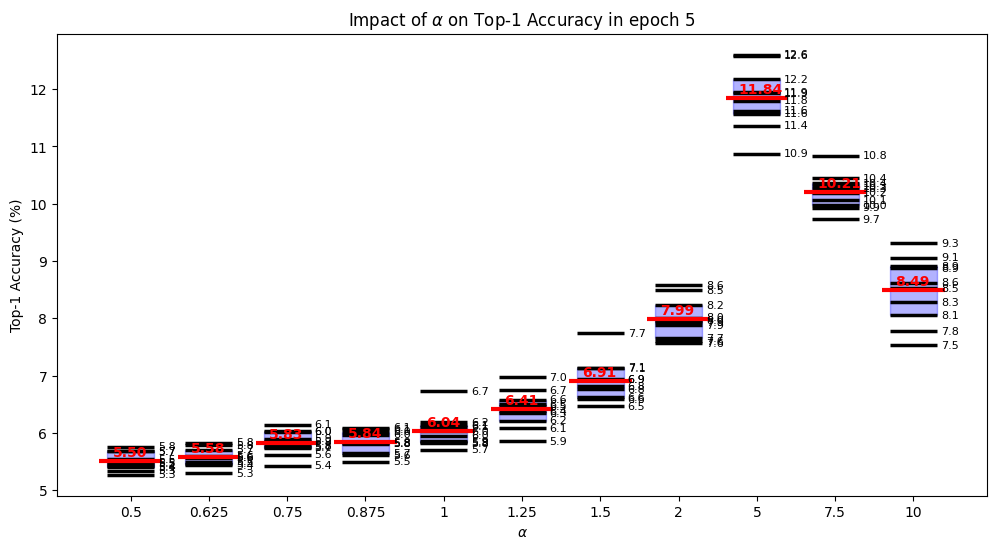

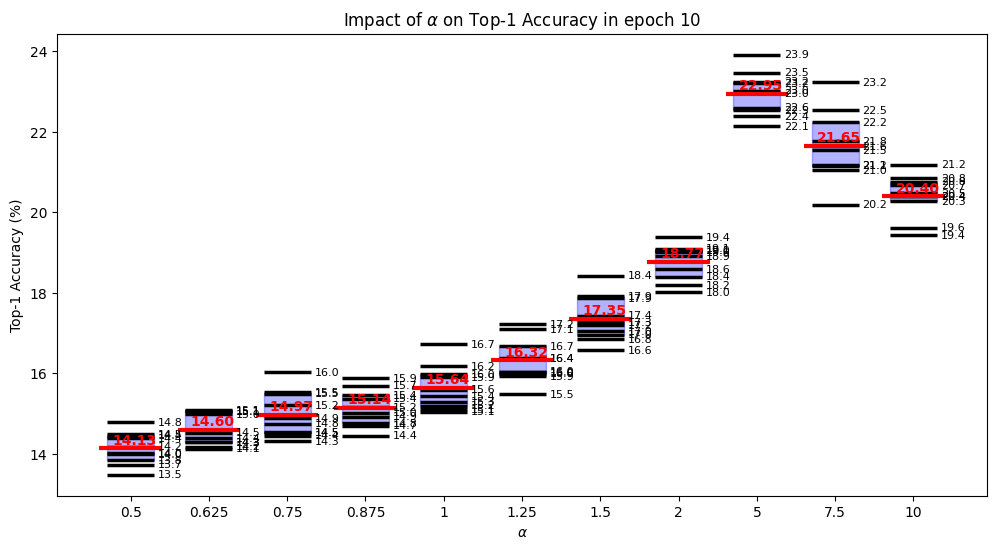

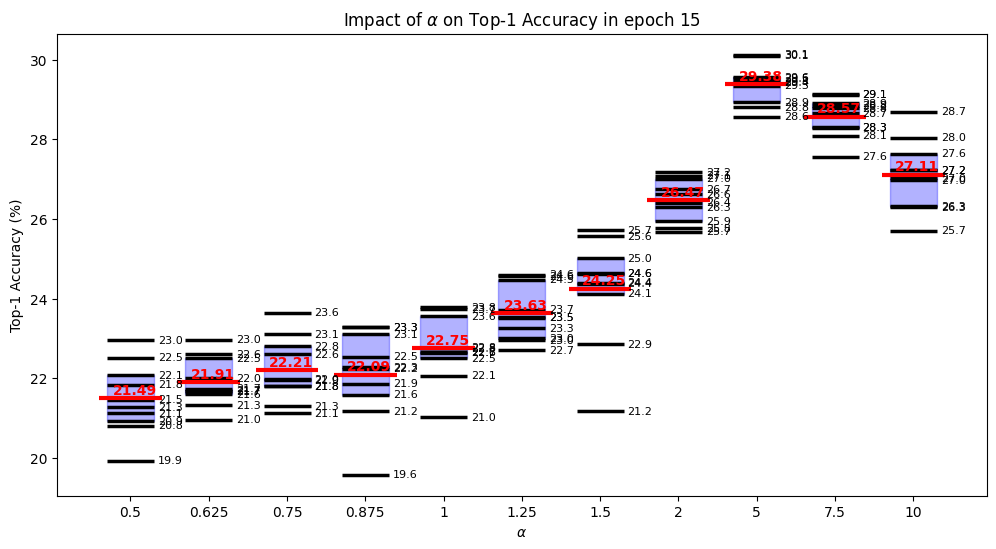

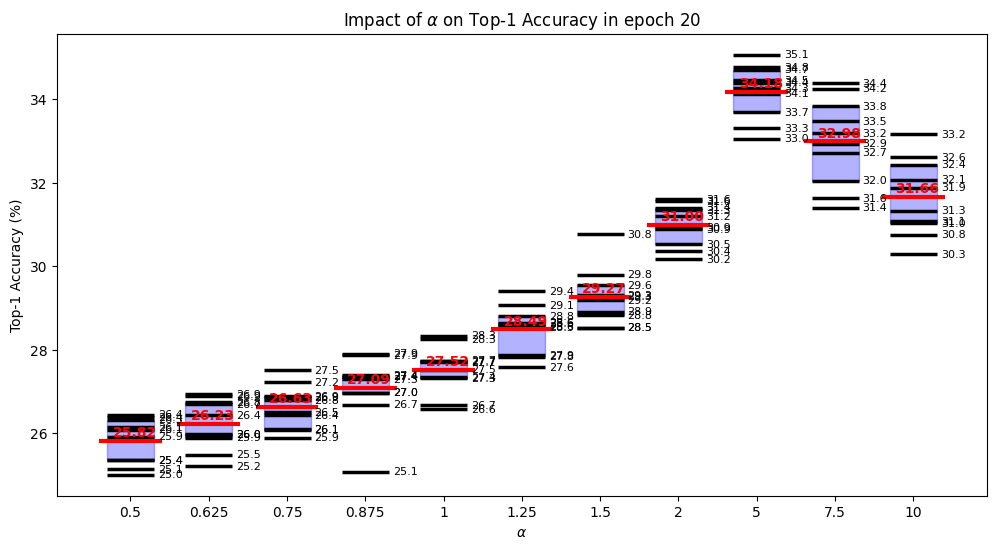

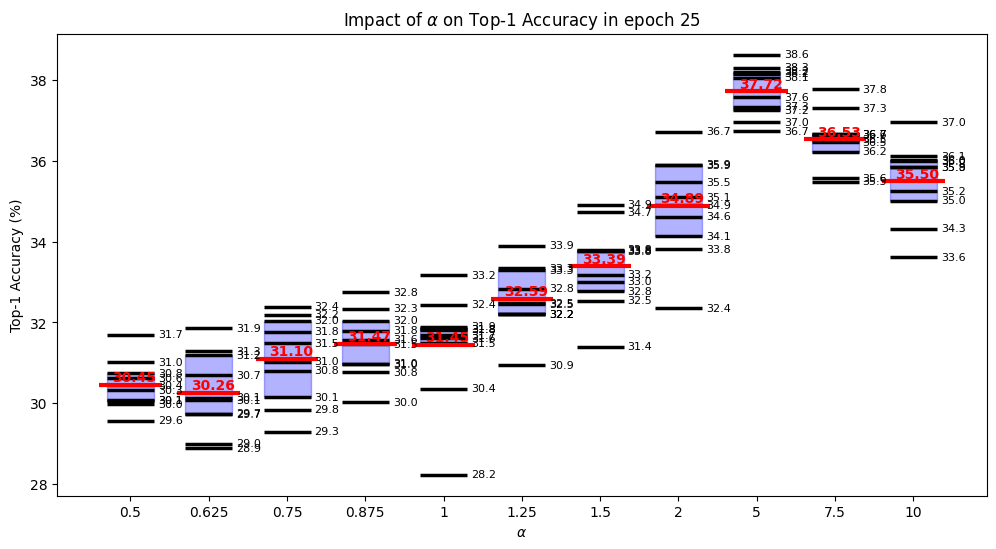

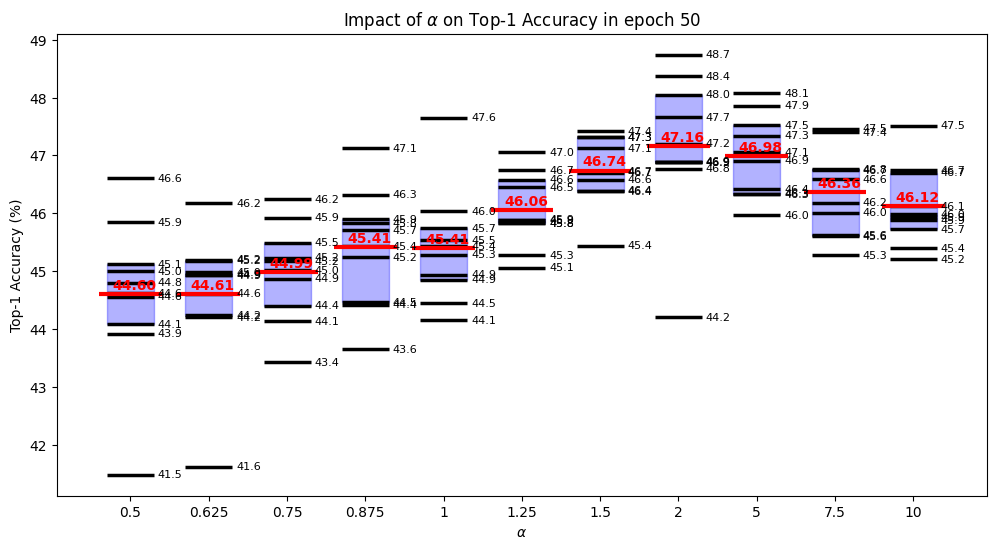

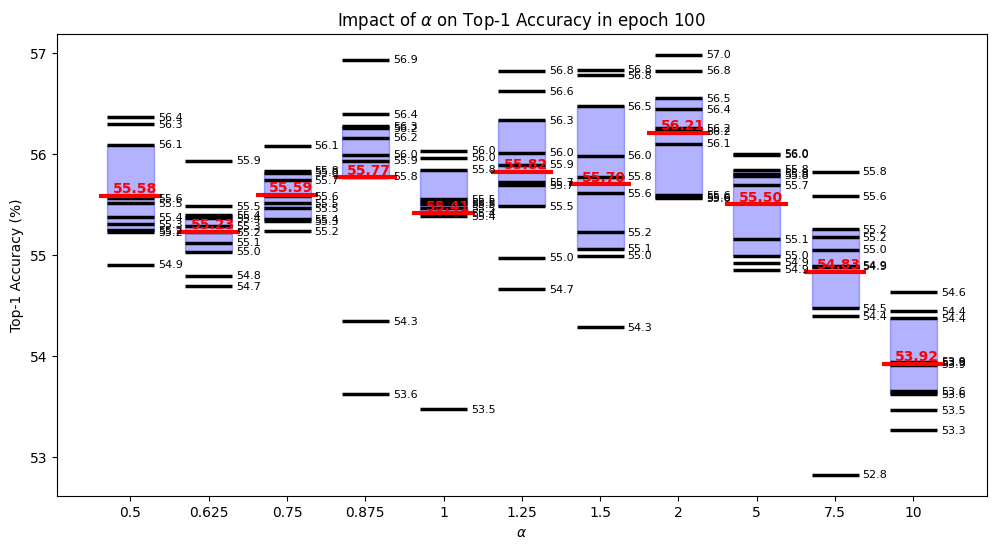

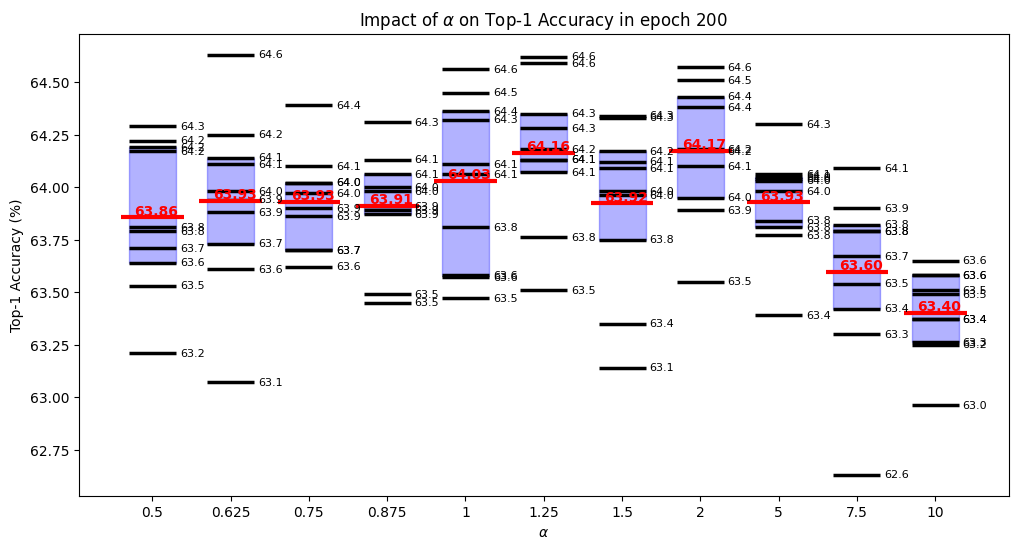

In [79]:
steps = [5,10,15,20,25,50,100,200]
mean_value_text_move = [0.15,0.2,0.2,0.2,0.18,0.15,0.07,0.03]
categories = ['0.5','0.625','0.75','0.875','1','1.25','1.5','2','5','7.5','10']
for iter,step in enumerate(steps):
    #step = 5
    
    data = {}
    for j,alpha in enumerate(categories):
        x = []
        for i in range(10):
            x.append(np.round(histories[10*j+i][step]['eval_top1'],2))
        data[alpha] = x
    
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Define the width of each dash line
    line_width = 0.3  # Controls the horizontal length of dashes
    boldness = 2.5  # Controls line thickness
    
    # Loop over each category and plot its observations
    for i, cat in enumerate(categories):
        y = sorted(data[cat])  # Sort values to determine the range for the rectangle
        x_start = np.full_like(y, i - line_width)  # Left endpoint
        x_end = np.full_like(y, i + line_width)  # Right endpoint
        
        # Get the range for the blue rectangle (between the 3rd and 8th best observations)
        lower_bound = y[2]  # 3rd best observation
        upper_bound = y[7]  # 8th best observation
        rect_width = 0.6  # Controls how wide the rectangle is
    
        # Draw the blue rectangle below observations
        ax.add_patch(plt.Rectangle((i - rect_width / 2, lower_bound), rect_width, upper_bound - lower_bound,
                                   color='blue', alpha=0.3, zorder=0))
    
        # Plot horizontal black lines for observations
        for xs, xe, yi in zip(x_start, x_end, y):
            ax.hlines(y=yi, xmin=xs, xmax=xe, color='black', linewidth=boldness)
            ax.text(xe + 0.05, yi, f'{yi:.1f}', va='center', fontsize=8)
    
        # Calculate and plot the mean line in red
        mean_value = np.mean(y)
        ax.hlines(y=mean_value, xmin=i - 0.4, xmax=i + 0.4, color='red', linewidth=3, label='Mean' if i == 0 else "")
        
        # Annotate the mean value in red
        ax.text(i-0.23, mean_value+mean_value_text_move[iter], f'{mean_value:.2f}', color='red', va='center', fontsize=10, fontweight='bold')
    
    # Set category labels on the x-axis.
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories)
    
    # Add labels and title.
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('Top-1 Accuracy (%)')
    ax.set_title(r'Impact of $\alpha$ on Top-1 Accuracy' + f' in epoch {step}')
    
    plt.show()

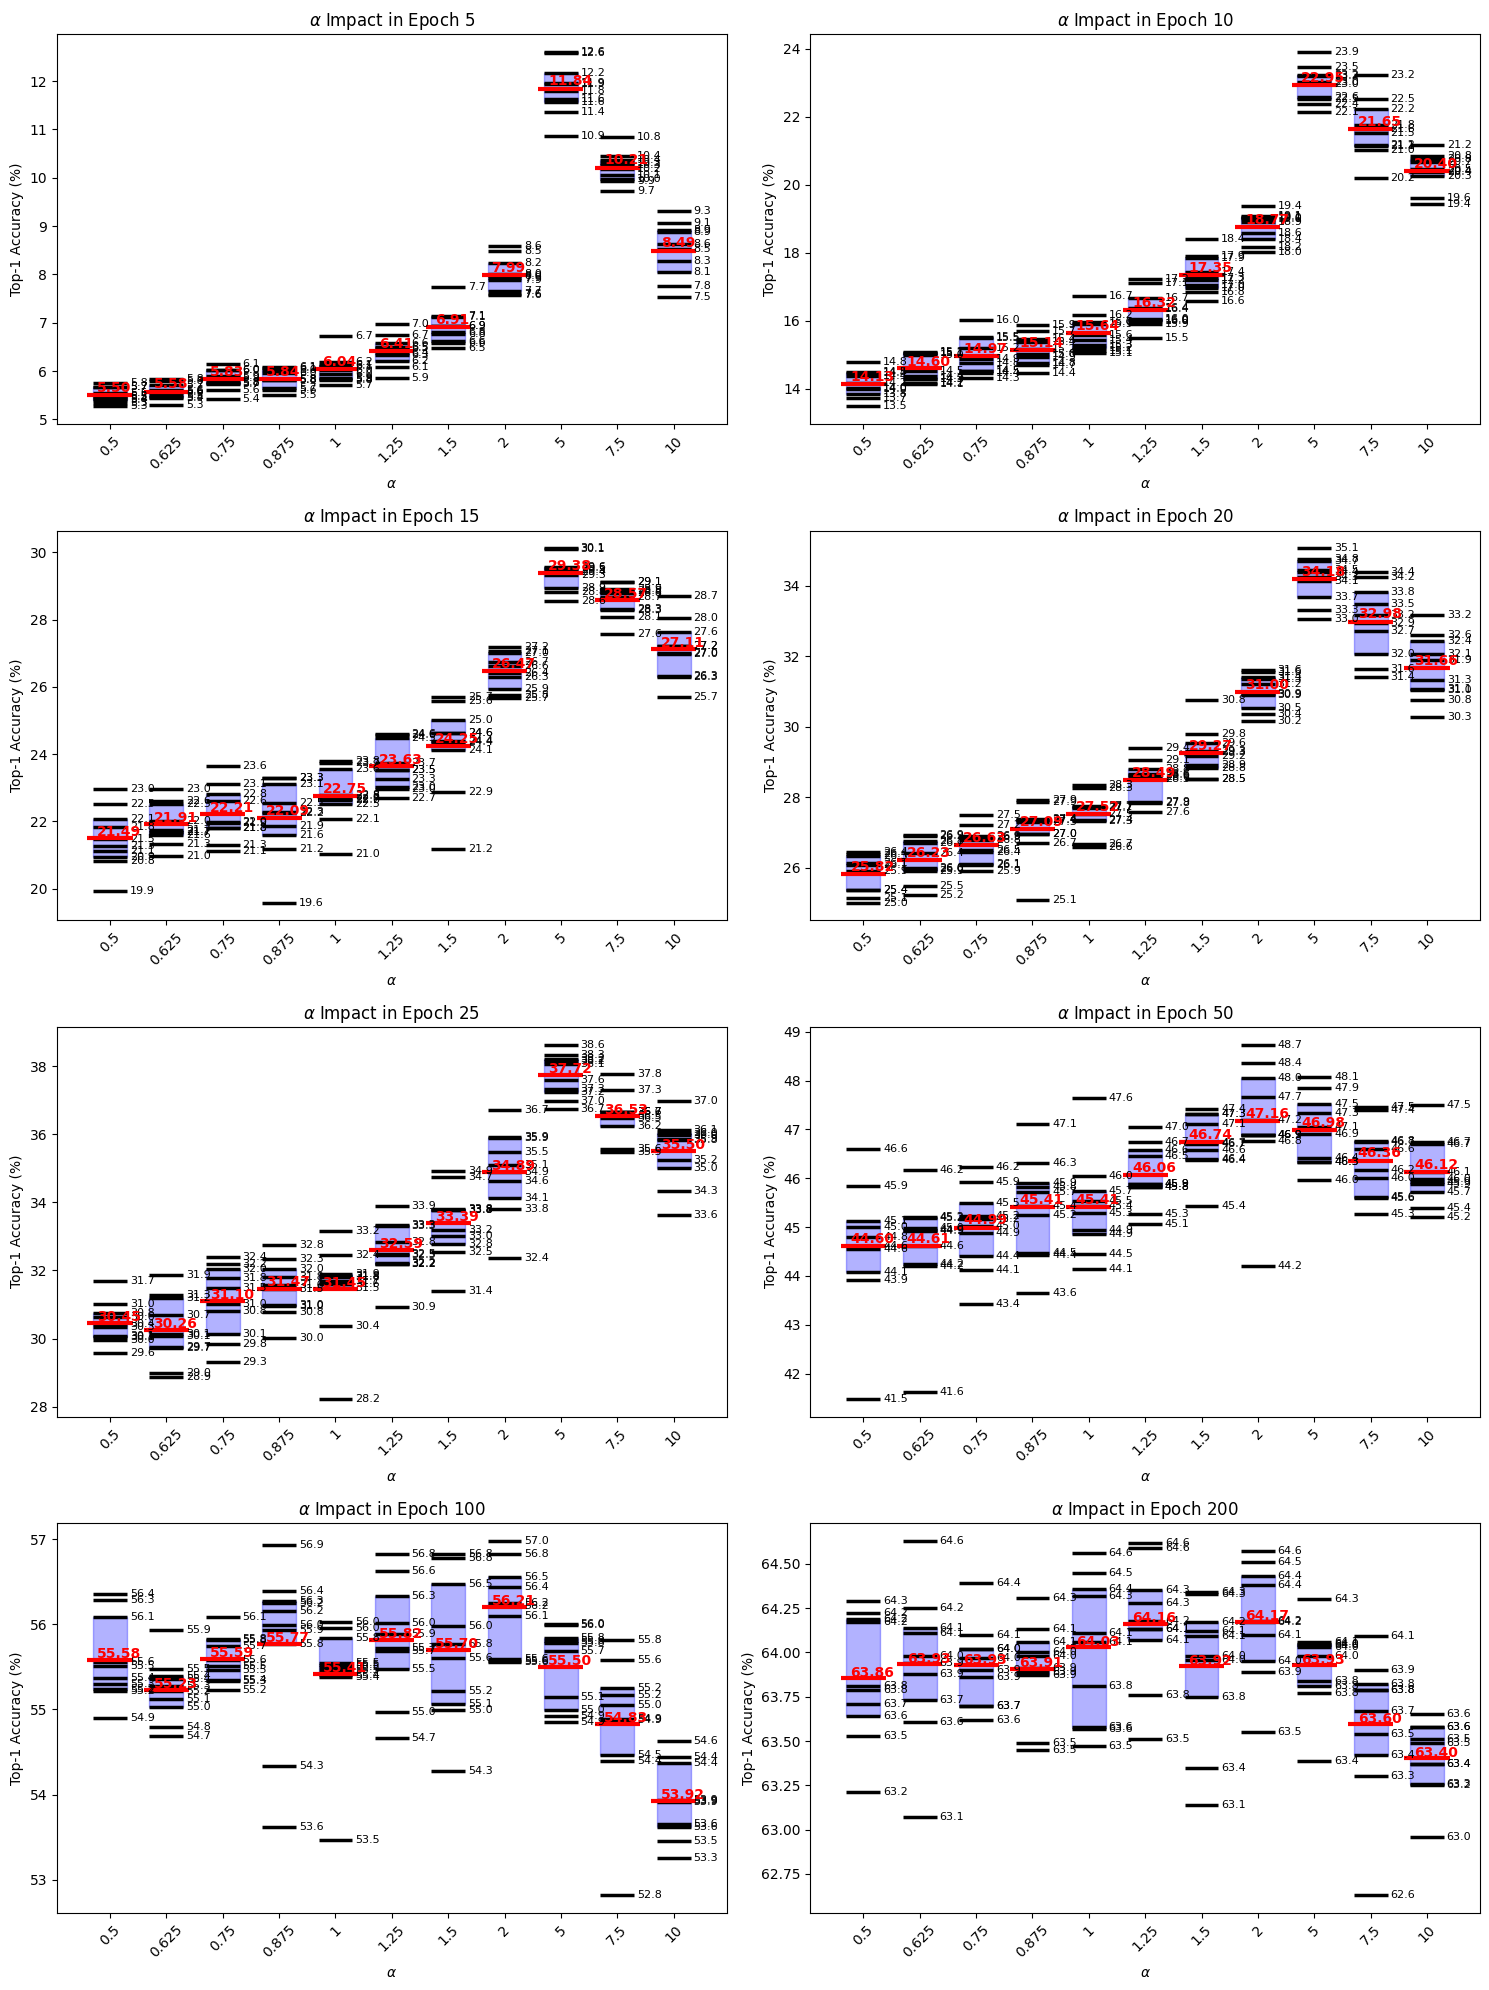

In [83]:
import numpy as np
import matplotlib.pyplot as plt

steps = [5, 10, 15, 20, 25, 50, 100, 200]
mean_value_text_move = [0.15, 0.2, 0.2, 0.2, 0.18, 0.15, 0.07, 0.03]
categories = ['0.5', '0.625', '0.75', '0.875', '1', '1.25', '1.5', '2', '5', '7.5', '10']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))  # Create 2x4 grid

for iter, step in enumerate(steps):
    row, col = divmod(iter, 2)  # Determine grid position
    ax = axes[row, col]  # Select subplot

    data = {}
    for j, alpha in enumerate(categories):
        x = [np.round(histories[10 * j + i][step]['eval_top1'], 2) for i in range(10)]
        data[alpha] = x

    # Define the width of each dash line
    line_width = 0.3  
    boldness = 2.5  

    # Loop over each category and plot observations
    for i, cat in enumerate(categories):
        y = sorted(data[cat])  
        x_start = np.full_like(y, i - line_width)  
        x_end = np.full_like(y, i + line_width)  

        # Blue rectangle for range (between 3rd and 8th best observations)
        lower_bound, upper_bound = y[2], y[7]  
        rect_width = 0.6  

        ax.add_patch(plt.Rectangle((i - rect_width / 2, lower_bound), rect_width, upper_bound - lower_bound,
                                   color='blue', alpha=0.3, zorder=0))

        # Plot horizontal black lines for observations
        for xs, xe, yi in zip(x_start, x_end, y):
            ax.hlines(y=yi, xmin=xs, xmax=xe, color='black', linewidth=boldness)
            ax.text(xe + 0.05, yi, f'{yi:.1f}', va='center', fontsize=8)

        # Calculate and plot mean line in red
        mean_value = np.mean(y)
        ax.hlines(y=mean_value, xmin=i - 0.4, xmax=i + 0.4, color='red', linewidth=3)
        ax.text(i - 0.23, mean_value + mean_value_text_move[iter], f'{mean_value:.2f}', 
                color='red', va='center', fontsize=10, fontweight='bold')

    # Set category labels
    ax.set_xticks(range(len(categories)))
    ax.set_xticklabels(categories, rotation=45)

    # Labels and title
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('Top-1 Accuracy (%)')
    ax.set_title(rf'$\alpha$ Impact in Epoch {step}')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()
